# Загрузка необходимых библиотек

In [3]:
from sklearn.datasets import load_iris
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
%matplotlib inline

# Загрузка датасета

In [4]:
iris = load_iris()

X = iris.data
y = iris.target

df = pd.DataFrame(X,columns=iris.feature_names)
df['Label']=y
df['Species']=df['Label'].map({0: 'setosa', 1: 'versicolor', 2: 'virginica'})

df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Label,Species
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa


# Использование PCA из библиотеки scikit-learn

In [5]:
pca = PCA()
X_pca = pca.fit_transform(X)

pca_df = pd.DataFrame(X_pca,columns=['PC1','PC2','PC3','PC4'])
df = pd.merge(df, pca_df, right_index=True, left_index=True)

In [33]:
print('Объясняемая дисперсия для каждого собственного вектора')
for i in range(4):
    print('PC{}: {}'.format(i+1,pca.explained_variance_ratio_[i]))

Объясняемая дисперсия для каждого собственного вектора
PC1: 0.9246187232017271
PC2: 0.05306648311706783
PC3: 0.017102609807929766
PC4: 0.005212183873275372


C:\Users\User\AppData\Local\Temp\ipykernel_14156\548681781.py:1: FutureWarning: Passing `palette` without assigning `hue` is deprecated.
  sns.stripplot(x="PC1", y="Species", data=df,jitter=True, palette = 'tab10')


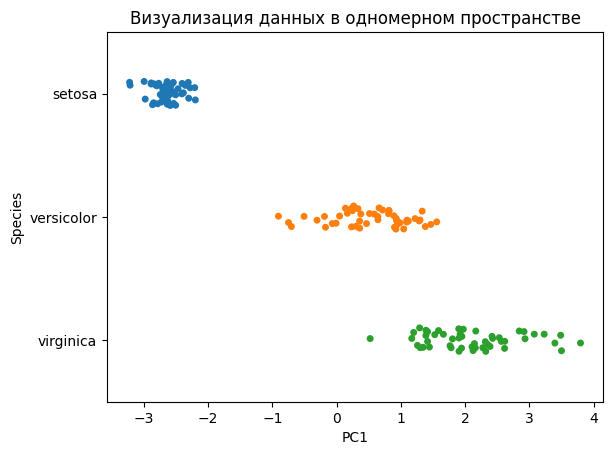

In [32]:
sns.stripplot(x="PC1", y="Species", data=df,jitter=True, palette = 'tab10')
plt.title('Визуализация данных в одномерном пространстве');

# Выбор необходимого числа главных компонент

In [19]:
precent_of_variance_explained = .95

pca = PCA(n_components=precent_of_variance_explained)

pca_data = pca.fit_transform(X)

print(f"{pca.n_components_} вектора главных компонент достаточно, чтобы объяснить {precent_of_variance_explained}% дисперсии имеющихся данных")

2 вектора главных компонент достаточно, чтобы объяснить 0.95% дисперсии имеющихся данных


In [155]:
pca.components_

array([[ 0.36138659, -0.08452251,  0.85667061,  0.3582892 ],
       [ 0.65658877,  0.73016143, -0.17337266, -0.07548102],
       [-0.58202985,  0.59791083,  0.07623608,  0.54583143],
       [-0.31548719,  0.3197231 ,  0.47983899, -0.75365743]])

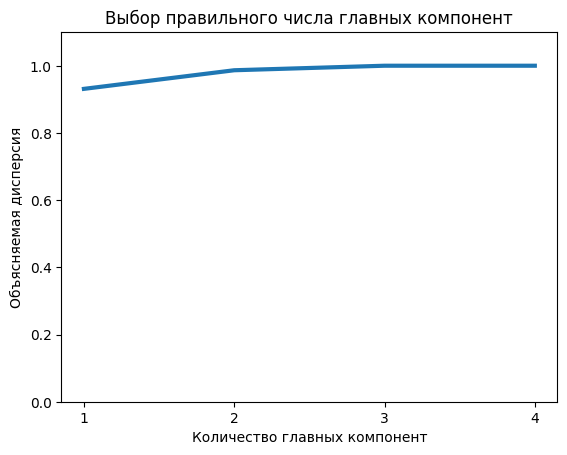

In [157]:
pca = PCA(svd_solver='full')
pca.fit(X)

cumsum = np.cumsum(pca.explained_variance_ratio_)
dim = np.arange(len(cumsum))+1

plt.plot(dim,cumsum,'-',lw=3);

plt.xlabel('Количество главных компонент')
plt.ylabel('Объясняемая дисперсия')
plt.title('Выбор правильного числа главных компонент')

plt.xticks([1,2,3,4])
plt.ylim([0,1.1]);

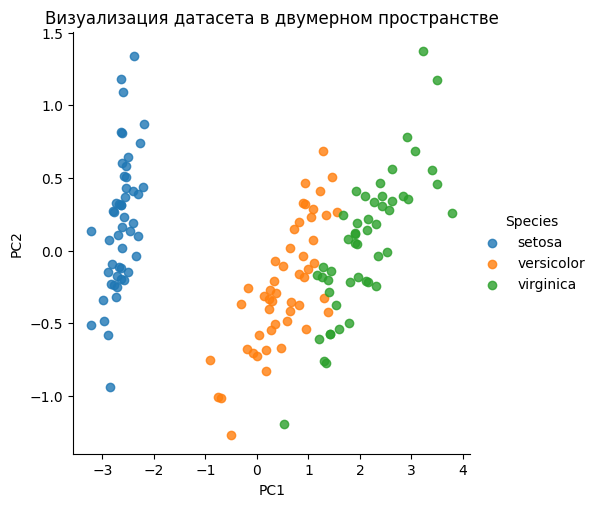

In [158]:
sns.lmplot(x='PC1', y='PC2',data=df,hue='Species',fit_reg=False)
plt.title('Визуализация датасета в двумерном пространстве');

# Self-made PCA

In [126]:
X = iris['data'].T

In [127]:
def mean(x):
    n = len(x)
    return sum(x)/n

for i in range(4):
    X[i] = X[i] - mean(X[i])

In [144]:
cov_matrix = np.zeros((4, 4))
for i in range(4):
    for j in range(4):
        cov_matrix[i][j] = mean(X[i]*X[j])
cov_matrix

array([[ 0.68112222, -0.04215111,  1.26582   ,  0.51282889],
       [-0.04215111,  0.18871289, -0.32745867, -0.12082844],
       [ 1.26582   , -0.32745867,  3.09550267,  1.286972  ],
       [ 0.51282889, -0.12082844,  1.286972  ,  0.57713289]])

In [145]:
w, v = np.linalg.eig(cov_matrix)

In [146]:
w, v = zip(*sorted(zip(w, v), reverse=True, key=lambda item: item[0]))

In [147]:
print('Eigenvalues: ', w)

Eigenvalues:  (4.200053427994634, 0.24105294294244228, 0.07768810337596647, 0.023676192353626443)


In [148]:
print('Eigenvectors: ')
v

Eigenvectors: 


(array([ 0.36138659, -0.65658877, -0.58202985,  0.31548719]),
 array([-0.08452251, -0.73016143,  0.59791083, -0.3197231 ]),
 array([ 0.85667061,  0.17337266,  0.07623608, -0.47983899]),
 array([0.3582892 , 0.07548102, 0.54583143, 0.75365743]))

In [149]:
# Выбор двух главных компонент

v = v[:2]

pca_X = np.array(v)@X

df_pca = pd.DataFrame({'pc1':pca_X[0], 'pc2':pca_X[1], 'Species': y})

In [150]:
df_pca

,pc1,pc2,Species
0,0.497869,-1.350754,0
1,0.753886,-0.968768,0
2,0.608494,-1.157687,0
3,0.521608,-0.956637,0
4,0.396071,-1.415317,0
...,...,...,...
145,-0.144809,0.479734,2
146,0.029142,0.886931,2
147,-0.311732,0.592555,2
148,-0.704543,0.349513,2


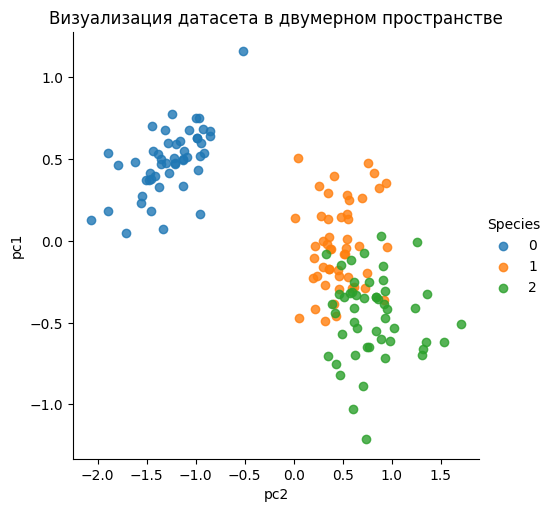

In [163]:
sns.lmplot(x='pc2', y='pc1',data=df_pca, hue='Species',fit_reg=False)
plt.title('Визуализация датасета в двумерном пространстве');